# K - Means Clustering.

<hr>

<img src = 'Kmeans.jpg' height = 50% width = 70%>

<hr><hr>

## Step by Step.

<img src = 'Kmeans1.jpg' height = 50% width = 70%>

<hr>

<img src = 'Kmeans2.jpg' height = 50% width = 70%>

<hr>

<img src = 'Kmeans3.jpg' height = 50% width = 70%>

<hr>

<img src = 'Kmeans4.jpg' height = 50% width = 70%>

<hr>

<img src = 'Kmeans5.jpg' height = 50% width = 70%>

##### We go back to step 4 and reassign our centroids iterate over steps 4 and 5 long enough to converge the initial and final centroids into a significantly same position.

<hr>

## Choosing the correct number of clusters i.e the value of K.

### Within Clusters Sum of Squares:

<img src = 'wcss.jpg' height = 30% width = 70%>

<img src = 'wcss1.jpg' height = 30% width = 70%>

##### Monotonically decreasing curve, choose the optimal number of clusters using the Elbow method, wherein there is no sharp decrease in the value of WCSS.

<hr><hr>

### Importing the libraries.
### Getting the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir(r'C:\Users\acer\Desktop\P14-Machine-Learning-AZ-Template-Folder\Machine Learning A-Z Template Folder\Part 4 - Clustering\Section 24 - K-Means Clustering\P14-K-Means\K_Means')
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.columns.values

array(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'], dtype=object)

In [6]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [80]:
df.shape

(200, 7)

## Labelling the age groups for visualization.

In [17]:
def ageCoder(myage):
    if myage>=18 and myage<=30:
        return "Youth"
    elif myage>30 and myage<=60:
        return "Working"
    elif myage>60:
        return "Senior"

<p>
<b>Syntax</b>:

s.apply(func, convert_dtype=True, args=())

<b>Parameters</b>:
<br>
func: .apply takes a function and applies it to all values of pandas series.
<br>
convert_dtype: Convert dtype as per the function’s operation.
<br>
args=(): Additional arguments to pass to function instead of series.
<br><br>
<b>Return Type</b>: Pandas Series after applied function/operation.
</p>

In [22]:
df['AgeClass'] = df['Age'].apply(ageCoder,convert_dtype = True)
df.head(3)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),AgeClass
0,1,Male,19,15,39,Youth
1,2,Male,21,15,81,Youth
2,3,Female,20,16,6,Youth


<hr>

## Labelling Annual Income for visualizaion.

In [51]:
range = income.max() - income.min()
lim1 = income.min() + (1/3)*range
lim2 = income.max() - (1/3)*range

print(income.min(), round(lim1), round(lim2), income.max())

15 56.0 96.0 137


In [52]:
def incomeCoder(salary):
    if salary<= lim1:
        return 'low'
    elif salary>lim1 and salary<=lim2:
        return 'medium'
    elif salary>lim2:
        return 'high'

In [53]:
df['IncomeClass'] = df['Annual Income (k$)'].apply(incomeCoder, convert_dtype = 1)
df.head(2)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),AgeClass,IncomeClass
0,1,Male,19,15,39,Youth,low
1,2,Male,21,15,81,Youth,low


<hr>

### Data Visualization.

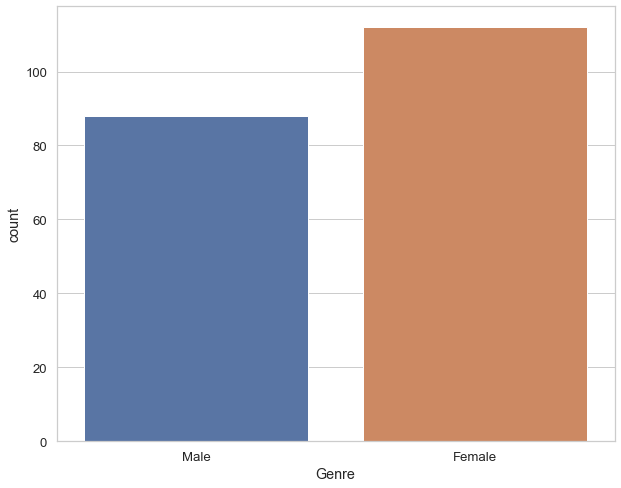

In [4]:
plt.figure(figsize = (10,8))
sns.set(style = 'whitegrid', font_scale = 1.2) 

sns.countplot(df.Genre)
plt.show()

##### More number of girls than boys.

In [5]:
df.Genre.value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

<hr>

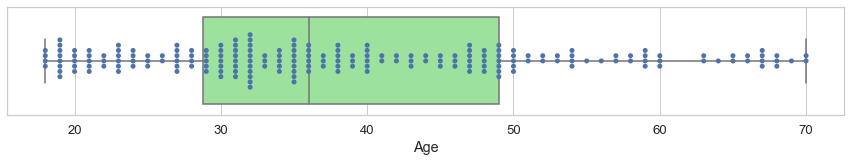

In [10]:
plt.figure(figsize = (15,2))
sns.set(style = 'whitegrid', font_scale = 1.2) 

sns.swarmplot(df.Age)
sns.boxplot(df.Age, color = 'lightgreen')

plt.show()

<hr>

In [24]:
pd.crosstab(df.Genre, df.AgeClass, margins = True)

AgeClass,Senior,Working,Youth,All
Genre,,,,
Female,6,72,34,112
Male,11,49,28,88
All,17,121,62,200


In [34]:
pd.crosstab(df.Genre, df.AgeClass, margins = True, normalize = 'index').round(3) * 100

AgeClass,Senior,Working,Youth
Genre,,,
Female,5.4,64.3,30.4
Male,12.5,55.7,31.8
All,8.5,60.5,31.0


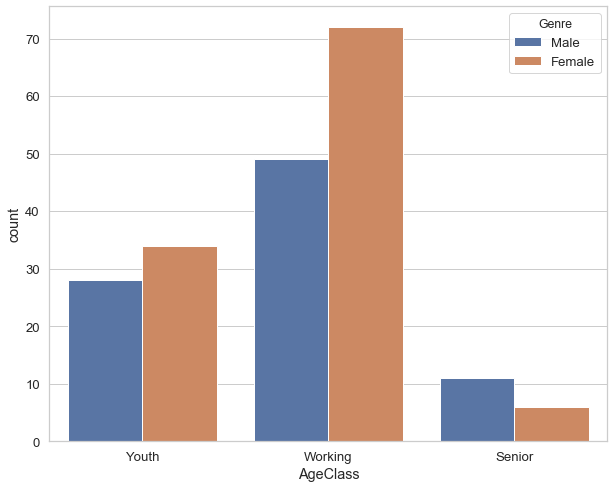

In [25]:
plt.figure(figsize = (10,8))
sns.set(style = 'whitegrid', font_scale = 1.2) 

sns.countplot(df.AgeClass, hue = df.Genre)
plt.show()

##### More number of working class females.
##### Minimum number of senior women.

<hr>

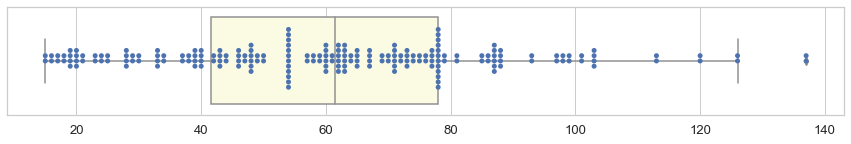

In [57]:
income = df.iloc[:,3].values
plt.figure(figsize = (15,2))
sns.set(style = 'whitegrid', font_scale = 1.2) 

sns.swarmplot(income)
sns.boxplot(income, color = 'lightyellow')

plt.show()

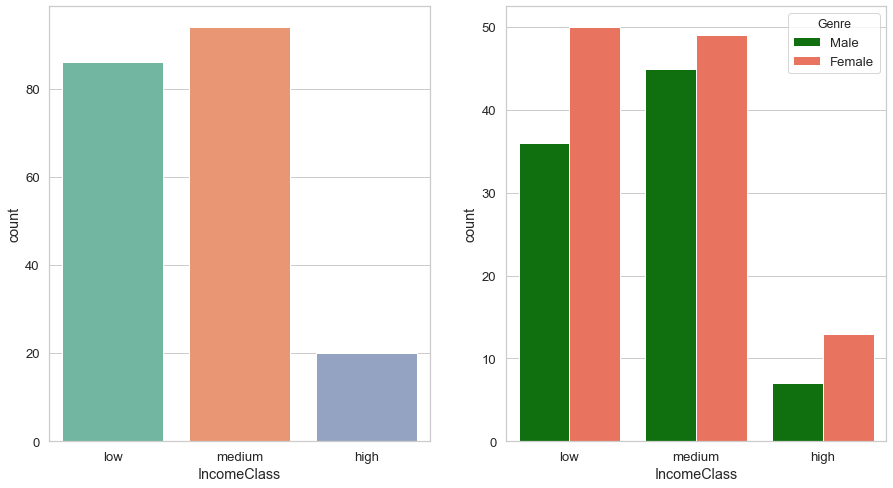

In [67]:
plt.figure(figsize = (15,8))
sns.set(style = 'whitegrid', font_scale = 1.2) 

plt.subplot(1,2,1)
sns.countplot(df.IncomeClass, palette = 'Set2')
plt.subplot(1,2,2)
sns.countplot(df.IncomeClass, hue = df.Genre, palette = ['green', 'tomato'])
plt.show()

<hr>

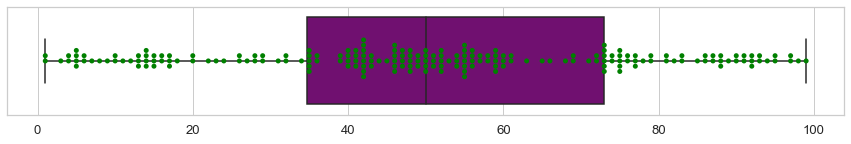

In [72]:
spend = df.iloc[:,4].values
plt.figure(figsize = (15,2))
sns.set(style = 'whitegrid', font_scale = 1.2) 

sns.swarmplot(spend, color = 'green')
sns.boxplot(spend, color = 'purple')

plt.show()

<hr>

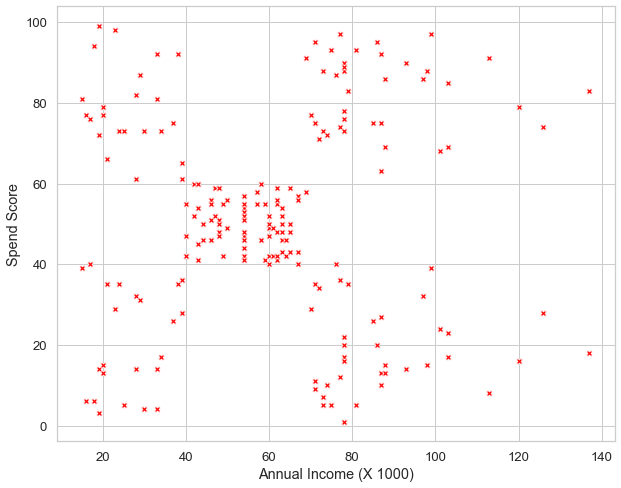

In [76]:
plt.figure(figsize = (10,8))
sns.set(style = 'whitegrid', font_scale = 1.2) 
sns.scatterplot(x = income, y = spend, marker = 'X', color = 'red')
plt.xlabel('Annual Income (X 1000)')
plt.ylabel('Spend Score')
plt.show()

<hr>

## Setting up variables.

In [78]:
X = df.iloc[:, [3,4]].values


### Using the elbow method to find the optimal number of clusters.

In [93]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)  #n_iter = 300 (default)
y_kmeans = kmeans.fit_predict(X)

"wcss.append(kmeans.inertia_)\n\nplt.plot(range(1, 11), wcss)\nplt.title('The Elbow Method')\nplt.xlabel('Number of clusters')\nplt.ylabel('WCSS')\nplt.show()"

In [94]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [101]:
X[y_kmeans == 1]

array([[ 70,  29],
       [ 71,  35],
       [ 71,  11],
       [ 71,   9],
       [ 72,  34],
       [ 73,   5],
       [ 73,   7],
       [ 74,  10],
       [ 75,   5],
       [ 76,  40],
       [ 77,  12],
       [ 77,  36],
       [ 78,  22],
       [ 78,  17],
       [ 78,  20],
       [ 78,  16],
       [ 78,   1],
       [ 78,   1],
       [ 79,  35],
       [ 81,   5],
       [ 85,  26],
       [ 86,  20],
       [ 87,  27],
       [ 87,  13],
       [ 87,  10],
       [ 88,  13],
       [ 88,  15],
       [ 93,  14],
       [ 97,  32],
       [ 98,  15],
       [ 99,  39],
       [101,  24],
       [103,  17],
       [103,  23],
       [113,   8],
       [120,  16],
       [126,  28],
       [137,  18]], dtype=int64)

In [104]:
print(X[y_kmeans == 1, 0])
print(X[y_kmeans == 1, 1])


[ 70  71  71  71  72  73  73  74  75  76  77  77  78  78  78  78  78  78
  79  81  85  86  87  87  87  88  88  93  97  98  99 101 103 103 113 120
 126 137]
[29 35 11  9 34  5  7 10  5 40 12 36 22 17 20 16  1  1 35  5 26 20 27 13
 10 13 15 14 32 15 39 24 17 23  8 16 28 18]


In [113]:
print(kmeans.cluster_centers_)   # For 5 clusters.

[[55.2962963  49.51851852]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]
 [86.53846154 82.12820513]]


## Visualising the clusters.

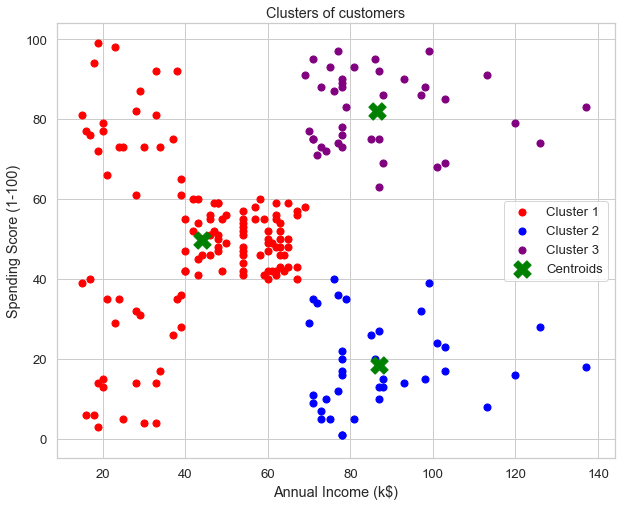

In [96]:
plt.figure(figsize = (10,8))
sns.set(style = 'whitegrid', font_scale = 1.2) 
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'purple', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'green', marker = 'X', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## Using upto 5 clusters.

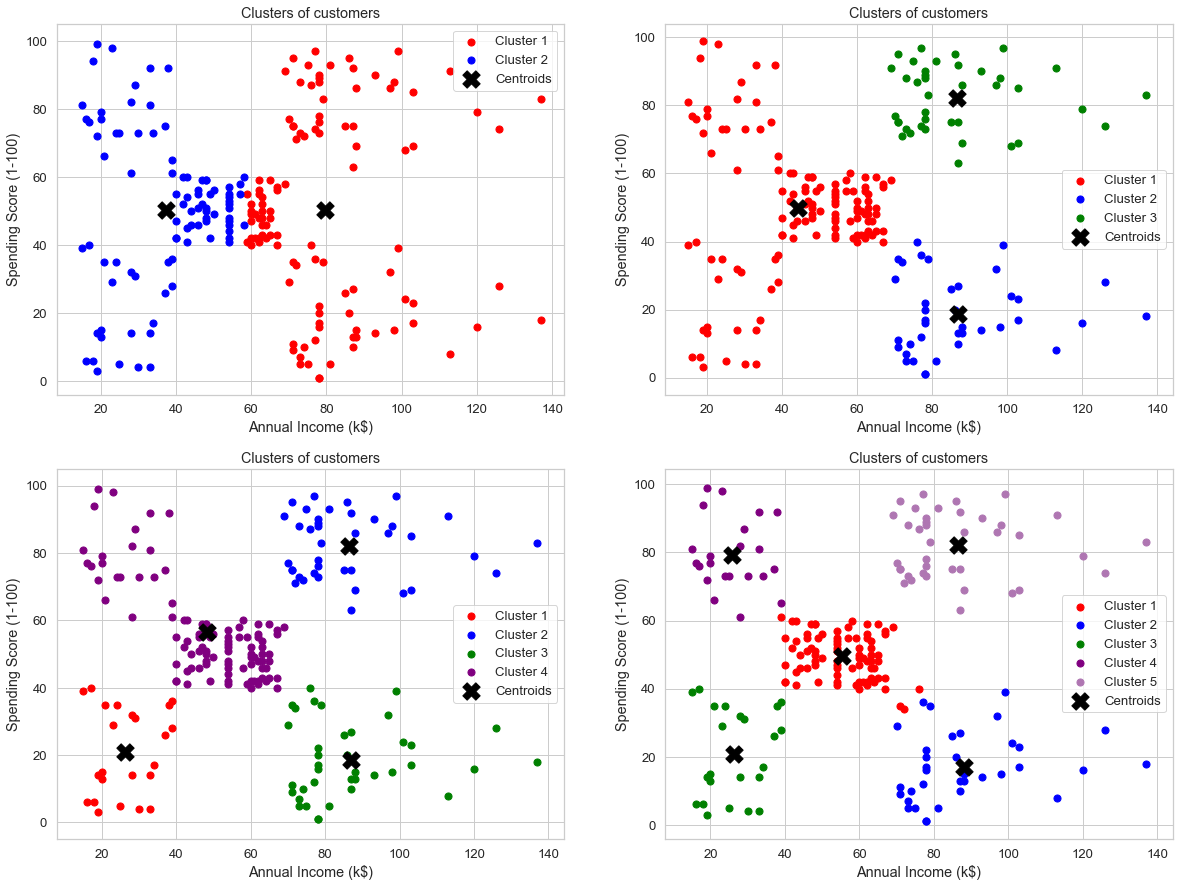

In [109]:
plt.figure(figsize = (20,15))
sns.set(style = 'whitegrid', font_scale = 1.2) 

kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)  #n_iter = 300 (default)
y_kmeans = kmeans.fit_predict(X)

plt.subplot(2,2,1)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black',
            marker = 'X', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)  #n_iter = 300 (default)
y_kmeans = kmeans.fit_predict(X)

plt.subplot(2,2,2)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black',
            marker = 'X', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)  #n_iter = 300 (default)
y_kmeans = kmeans.fit_predict(X)

plt.subplot(2,2,3)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'purple', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black',
            marker = 'X', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)  #n_iter = 300 (default)
y_kmeans = kmeans.fit_predict(X)

plt.subplot(2,2,4)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'purple', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = '#af76b2', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black',
            marker = 'X', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

<hr>

## Using Within Clusters Sum of Squares.

In [123]:
wcss = []
hh = np.arange(1,11)
for ii in hh:
    kmeans  = KMeans(n_clusters = ii, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
print(wcss)

[269981.28, 181363.59595959596, 106348.37306211118, 73679.78903948834, 44448.45544793371, 37233.81451071001, 30259.65720728547, 25011.83934915659, 21850.165282585633, 19672.07284901432]


### Visualizing using a plot.

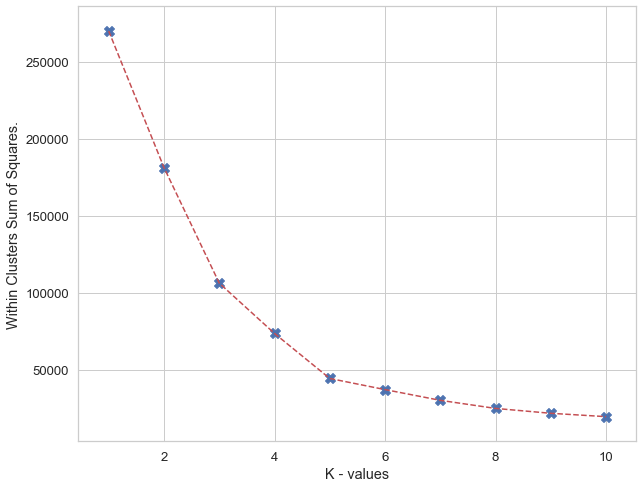

In [130]:
plt.figure(figsize = (10,8))
sns.set(style = 'whitegrid', font_scale = 1.2) 
plt.plot(hh, wcss, 'r--')
plt.scatter(hh, wcss, s= 100,marker = 'X')
plt.xlabel('K - values')
plt.ylabel('Within Clusters Sum of Squares.')
plt.show()

##### Using the elbow method, we choose k = 5 as our optimal value of K.

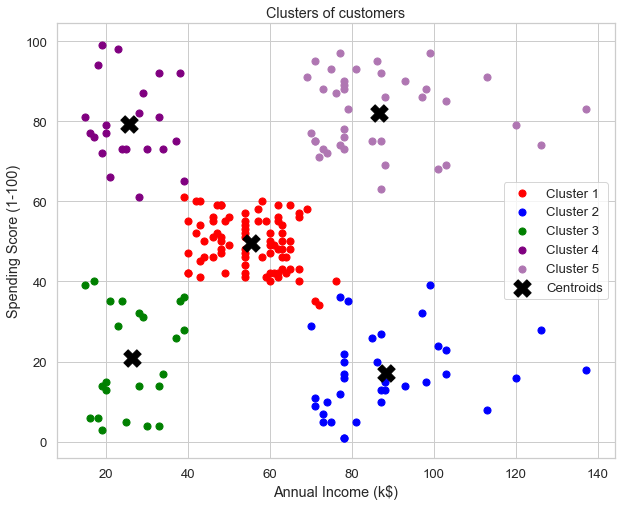

In [132]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)  #n_iter = 300 (default)
y_kmeans = kmeans.fit_predict(X)

plt.figure(figsize = (10,8))
sns.set(style = 'whitegrid', font_scale = 1.2) 

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'purple', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = '#af76b2', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black',
            marker = 'X', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# The End.